# Introduzione a TensorFlow - parte prima

[post LinkedIn su TensorFlow](https://www.linkedin.com/feed/update/urn:li:activity:7124748804980932608?utm_source=share&utm_medium=member_desktop)

In [ ]:
from IPython.display import Image
%matplotlib inline

## TensorFlow: le prestazioni del training

### Sfide prestazionali

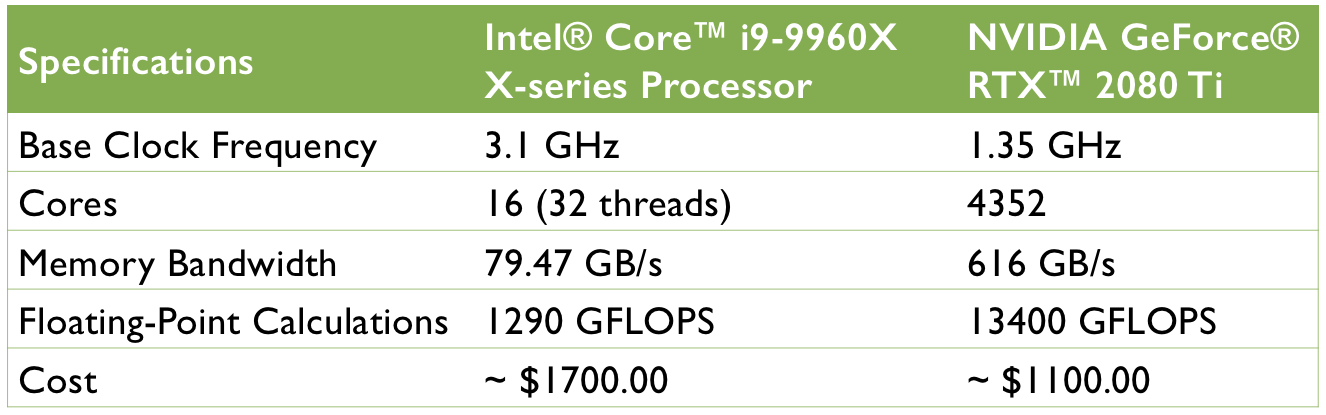

In [ ]:
Image(filename='images/01.png', width=800)

### Cos'è TensorFlow?

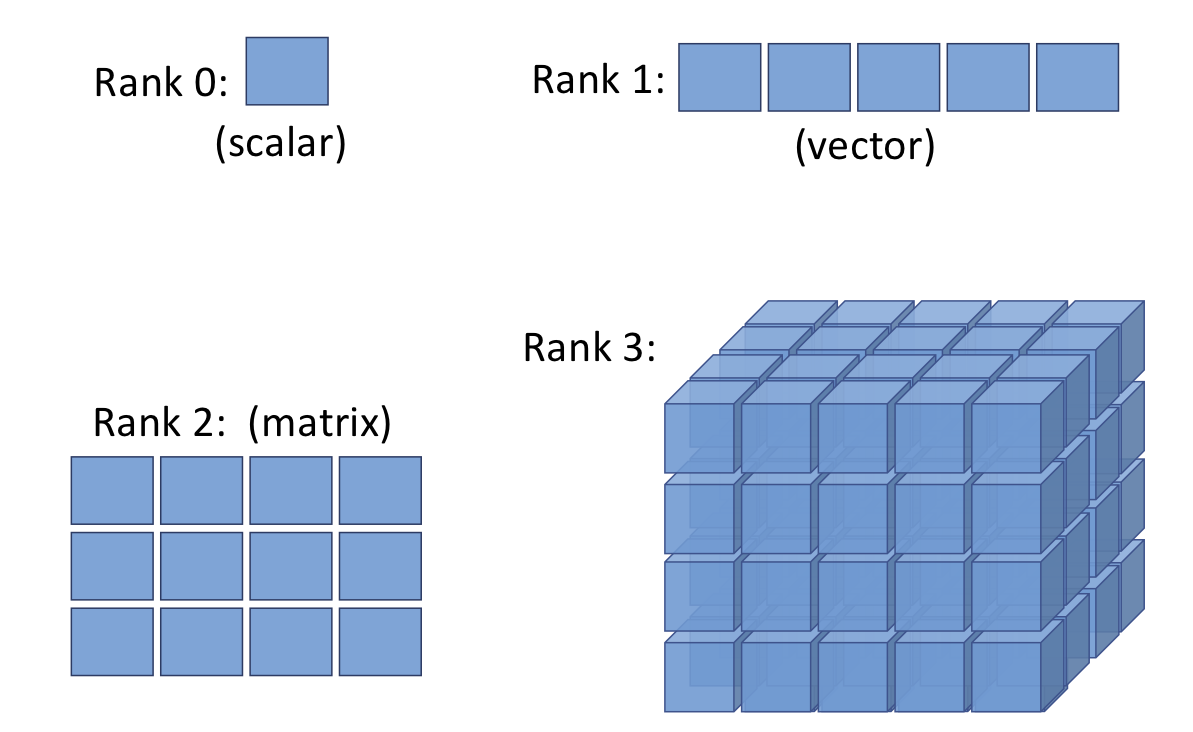

In [ ]:
Image(filename='images/02.png', width=500)   # --> tipi di tensori (il RANGO)

Un tensore ha un certo numero di dimensioni (il **rango**, aka ***rank***), ognuna associata ad un certo numero di componenti (***shape***).

## *TensorFlow*

TensorFlow fornisce una API **scalabile e multi-piattaforma** per implementare ed eseguire <u>algoritmi di Machine Learning</u>.<br><br>
E' un software *open-source* prodotto e sostenuto da Google, con una grande comunità di supporto e moltissime risorse disponibili on-line, facilmente accessibili. Un grande team di esperti <u>migliora ed espande</u> TensorFlow in modo continuativo.<br><br>
La release 0 è del 2015, la prima stabile (1.0) del 2017, l'attuale (2.X) del 2019, che è stata una major release profondamente rivista. Questo corso utilizza la versione 2.X<br><br>
La principale novità della release 2.0 è stata la computazione **dinamica** (anzichè statica) dei grafi, anche detta *eager execution*. Inoltre TensorFlow 2 è molto più simile a *Python* e *numpy* che la v 1. e dunque risulta familiare ad un utente Python.<br><br>
Una importante caratteristica di TensorFlow è la possibilità di funzionamento con **CPU o GPU, anche multiple** (la modalità raccomandata per le prestazioni molto migliori, anche di 5/6 volte). E' molto utile per allenare in modo efficiente <u>reti profonde su grandi dataset</u>. Vedi [qui](https://www.tensorflow.org/guide/gpu) su come usare le GPU con *TensorFlow*.<br><br>
Infine, TensorFlow supporta il deployment su piattaforme ***mobile***.<br><br>
In breve tempo TensorFlow è diventata la libreria di deep learning **più adottata**, sia in ambito accademico che industriale.<br><br>
Come vedremo più avanti, TensorFlow, che è una API *low-level*, può essere incapsulata da ***keras***, un'API *high_level*, più astratta e di facile utilizzo.

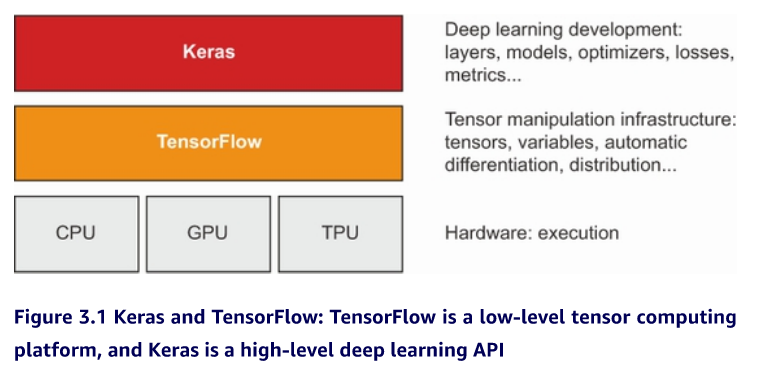

In [ ]:
Image(filename='images/keras_tf_support.png', width=800)

## Primi passi con TensorFlow

### Installare TensorFlow

In [ ]:
# da un prompt Anaconda: pip install tensorflow

In [ ]:
import tensorflow as tf
print('TensorFlow version:', tf.__version__)
import numpy as np

np.set_printoptions(precision=3)

TensorFlow version: 2.8.0


Se si dispone di una o più **GPU**, è possibile installare TensorFlow per GPU con il seguente comando (da un prompt Anaconda):<br>
*pip install tensorflow-gpu*<br><br>
La tendenza del momento è usare hardware specializzato per deep learning, ad esempio le **TPU** (*Tensor Processing Unit*) di Google, disponibili in cloud  tramite **Google Colab** (un ambiente per notebook che non necessita di installazione locale, è sufficiente un browser; [qui](https://colab.research.google.com/)). L'addestramento di una rete su TPU V2 richiede alcuni passi non semplici e del lavoro in più, tuttavia è estremamente veloce (anche 15 volte più veloce che su una GPU Nvidia P100).<br><br>
In Colab si può usare gratuitamente una TPU ad 8 core.

In caso di problemi con l'installazione di *TensorFlow* vedi [qui](https://www.tensorflow.org/install).

### Creare dei tensori in TensorFlow

In [ ]:
a = np.array([1, 2, 3], dtype=np.int32)
b = [4, 5, 6]

t_a = tf.convert_to_tensor(a)
t_b = tf.convert_to_tensor(b)

print(t_a)
print(t_b)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor([4 5 6], shape=(3,), dtype=int32)


In [ ]:
tf.is_tensor(a), tf.is_tensor(t_a)

(False, True)

In [ ]:
t_ones = tf.ones((2, 3))

t_ones.shape

TensorShape([2, 3])

In [ ]:
t_ones.numpy()

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [ ]:
const_tensor = tf.constant([1.2, 5, np.pi], dtype=tf.float32)

print(const_tensor)

tf.Tensor([1.2   5.    3.142], shape=(3,), dtype=float32)


### Manipolare il data-type e la forma di un tensore

In [ ]:
t_a_new = tf.cast(t_a, tf.int64)

print(t_a_new.dtype)

<dtype: 'int64'>


In [ ]:
t = tf.random.uniform(shape=(3, 5))

t_tr = tf.transpose(t)
print(t.shape, ' --> ', t_tr.shape)

(3, 5)  -->  (5, 3)


In [ ]:
t = tf.zeros((30,))

t_reshape = tf.reshape(t, shape=(5, 6))

print(t_reshape.shape)

(5, 6)


In [ ]:
t = tf.zeros((1, 2, 1, 4, 1))

t_sqz = tf.squeeze(t, axis=(2, 4))

print(t.shape, ' --> ', t_sqz.shape)

(1, 2, 1, 4, 1)  -->  (1, 2, 4)


### Applicare delle operazioni matematiche ad un tensore

In [ ]:
tf.random.set_seed(1)

t1 = tf.random.uniform(shape=(5, 2),
                       minval=-1.0,
                       maxval=1.0)

t2 = tf.random.normal(shape=(5, 2),
                      mean=0.0,
                      stddev=1.0)


In [ ]:
t3 = tf.multiply(t1, t2).numpy()
print(t3)

[[-0.27  -0.874]
 [-0.017 -0.175]
 [-0.296 -0.139]
 [-0.727  0.135]
 [-0.401  0.004]]


In [ ]:
t4 = tf.math.reduce_mean(t1, axis=0)

print(t4)

tf.Tensor([0.09  0.207], shape=(2,), dtype=float32)


In [ ]:
t5 = tf.linalg.matmul(t1, t2, transpose_b=True)

print(t5.numpy())

[[-1.144  1.115 -0.87  -0.321  0.856]
 [ 0.248 -0.191  0.25  -0.064 -0.331]
 [-0.478  0.407 -0.436  0.022  0.527]
 [ 0.525 -0.234  0.741 -0.593 -1.194]
 [-0.099  0.26   0.125 -0.462 -0.396]]


In [ ]:
t6 = tf.linalg.matmul(t1, t2, transpose_a=True)

print(t6.numpy())

[[-1.711  0.302]
 [ 0.371 -1.049]]


In [ ]:
norm_t1 = tf.norm(t1, ord=2, axis=1).numpy()

print(norm_t1)

[1.046 0.293 0.504 0.96  0.383]


In [ ]:
np.sqrt(np.sum(np.square(t1), axis=1))

array([1.046, 0.293, 0.504, 0.96 , 0.383], dtype=float32)

# I grafi di TensorFlow

TensorFlow e PyTorch costruiscono grafi computazionali.

Il vantaggio di usare un **grafo computazionale** (statico o dinamico) è che il calcolo non viene visto come una sequenza “procedurale” di istruzioni, ma come una **struttura matematica esplicita** fatta di nodi (operazioni) e archi (tensori).
Questo cambia molto in termini di efficienza, controllo e apprendimento.

In [ ]:
Image(filename='content/grafo.png', width=800)

## 1) Automatic differentiation (vantaggio principale)

Il grafo permette di **calcolare automaticamente le derivate**.

In una rete neurale serve: $\frac{\partial \mathcal{L}}{\partial W}$

Il grafo:
* **memorizza tutte le operazioni fatte nel forward pass** (disattivabile)
* consente di applicare la [**chain rule**](https://en.wikipedia.org/wiki/Chain_rule)
* rende possibile la **backpropagation automatic**a

> > Senza grafo:
* le derivate andrebbero scritte a mano (impraticabile).

---

## 2) Ottimizzazione del calcolo

Un grafo consente al framework di:
* riordinare le operazioni
* eliminare calcoli ridondanti
* fondere operazioni
* **parallelizzare su CPU/GPU/TPU**

Questo vale soprattutto per grafi statici.

---

## 3) Parallelismo naturale

Nel grafo:
* nodi indipendenti possono essere eseguiti in parallelo
* sfruttamento pieno dell’hardware

Esempio:
* due rami della rete → eseguiti contemporaneamente su GPU.

---

## 4) Portabilità e deployment

Un grafo è:
* serializzabile
* salvabile
* **eseguibile senza Python**

Per esempio:
* TensorFlow SavedModel
* ONNX

Serve per:
* produzione
* mobile
* inference server

---

## 5) Tracciabilità matematica

Il modello diventa:
* ispezionabile
* analizzabile
* visualizzabile

Si può vedere:
* quali operazioni compone la rete
* dove nasce la loss
* come fluiscono i gradienti

---

## 6) Differenza nei vantaggi tra statico e dinamico

### Grafo statico

Vantaggi principali:
* performance
* ottimizzazione globale
* deploy industriale

### Grafo dinamico

Vantaggi principali:
* flessibilità
* debugging
* ricerca e prototipazione

---

## Idea chiave

Il grafo è la rappresentazione naturale di una funzione composta:
$$f(x) = f_3(f_2(f_1(x)))$$

La rete neurale non è codice procedurale:

è una **composizione di trasformazioni matematiche**.

Il grafo rende esplicita questa struttura e permette a:
* autodiff
* GPU
* ottimizzatori
di lavorare in modo efficiente.

---
TensorFlow v2 , nel 2019, ha introdotto i **grafi dinamici**: sono modalità di esecuzione in cui le operazioni vengono costruite **ed eseguite immediatamente**, passo per passo, invece di definire prima un grafo computazionale statico e poi lanciarlo.

Per capire bene, conviene partire dalla <u>distinzione storica</u>.

---

## Grafi statici (TensorFlow 1.x)

Il modello veniva descritto come un grafo matematico **prima dell’esecuzione**:
* si definivano nodi e archi
  * nodi = operazioni
  * archi = tensori
* si costruiva l’intero grafo
* poi si eseguiva dentro una `Session`

Esempio concettuale:
* prima definizione
* poi esecuzione

Questo approccio:
* molto efficiente
* meno intuitivo
* difficile da debuggare

---

## Grafi dinamici (TensorFlow 2.x)
E' la famosa [*eager execution*](https://jonathan-hui.medium.com/tensorflow-eager-execution-v-s-graph-tf-function-6edaa870b1f1).

Con TensorFlow moderno (v2.x+):
* le operazioni vengono **eseguite subito**
* il grafo nasce “al volo” mentre il codice gira
* il comportamento è **simile a Python/PyTorch**

Esempio concettuale:

```python
  x = tf.constant(3.0)
  y = x * 2
  print(y)
```

Qui:
* non si costruisce prima un grafo
* l’operazione viene eseguita **immediatamente**

Questo è ciò che si intende per **grafo dinamico**.

---

## Perché si chiamano comunque “grafi”

Perché sotto il cofano TensorFlow **rappresenta** sempre il calcolo come:
* nodi = operazioni
* archi = tensori

Solo che:
* nel caso statico → grafo definito <u>prima</u>
* nel caso dinamico → grafo costruito <u>mentre il programma gira</u>

---

## Ruolo di `tf.function`

Con `tf.function` TensorFlow introduce un compromesso:

```python
  @tf.function
  def f(x):
      return x * 2
```

Qui succede:
1. si scrive codice Python “normale”
2. TensorFlow lo traccia
3. costruisce automaticamente un **grafo statico ottimizzato**

Quindi:
* **eager = grafo dinamico**
* `tf.function` = **conversione automatica in grafo statico**

---

## Differenza concettuale chiave

| Aspetto      | Grafo statico         | Grafo dinamico           |
| ------------ | --------------------- | ------------------------ |
| Quando nasce | Prima dell’esecuzione | Durante l’esecuzione     |
| Debug        | difficile             | semplice                 |
| Flessibilità | minore                | maggiore                 |
| Prestazioni  | molto alte            | alte ma meno ottimizzate |
| Stile        | “matematico”          | “Pythonico”              |

---

## Intuizione

Un grafo dinamico è come:
* scrivere codice Python e vederlo eseguire subito
* la struttura del modello può cambiare a runtime
* utile per:
  * prototipazione
  * modelli con flussi condizionali
  * ricerca

È lo stesso paradigma che ha reso PyTorch molto popolare.


### Suddividere, combinare e concatenare i tensori

In [ ]:
tf.random.set_seed(1)

t = tf.random.uniform((6,))

print(t.numpy())

t_splits = tf.split(t, 3)

[item.numpy() for item in t_splits]

[0.165 0.901 0.631 0.435 0.292 0.643]


[array([0.165, 0.901], dtype=float32),
 array([0.631, 0.435], dtype=float32),
 array([0.292, 0.643], dtype=float32)]

In [ ]:
tf.random.set_seed(1)
t = tf.random.uniform((5,))

print(t.numpy())

t_splits = tf.split(t, num_or_size_splits=[3, 2])

[item.numpy() for item in t_splits]

[0.165 0.901 0.631 0.435 0.292]


[array([0.165, 0.901, 0.631], dtype=float32),
 array([0.435, 0.292], dtype=float32)]

In [ ]:
A = tf.ones((3,))
B = tf.zeros((2,))

C = tf.concat([A, B], axis=0)
print(C.numpy())

[1. 1. 1. 0. 0.]


In [ ]:
A = tf.ones((3,))
B = tf.zeros((3,))

S = tf.stack([A, B], axis=1)
print(S.numpy())

[[1. 0.]
 [1. 0.]
 [1. 0.]]


### *Reshaping* di un tensore

E' possibile modificare la *shape* di un tensore:
* trasporre un tensore con *tf.transpose()*
* fare *reshaping* di un tensore con: *tf.reshape()*; [qui](https://www.tensorflow.org/api_docs/python/tf/reshape#:~:text=reshape%20does%20not%20change%20the,tensor%20it%20is%20operating%20on.&text=To%20instead%20reorder%20the%20data,transpose%20.) per dettagli
* togliere dal tensore le dimensioni inutili con *tf.squeeze*.

## Costruire delle pipeline di input con *tf.data* - la *TensorFlow Dataset API*
* quando si allena una NN profonda, in genere il modello è costruito incrementalmente con un algoritmo di ottimizzazione iterativo, come ad esempio *Stochastic Gradient Descent*;
* la API di *keras* è un *wrapper* intorno a TensorFlow per costruire NN;
* la API di *keras* fornisce il metodo *fit* per allenare le NN;
* se il dataset è abbastanza piccolo, può essere caricato come tensore in memoria e manipolato da TensorFlow;
* se invece il dataset è grande per stare tutto in memoria (come tensore), si deve leggerlo a pezzi (*chunk*);
* inoltre, può essere utile costruire delle *pipeline di data-processing* per applicare alcune trasformazioni o pre-elaborazioni al dataset, come ad esempio: centratura, scaling, aggiunta di rumore (per prevenire l'overfitting);
* l'applicazione manuale (e ripetuta) di questi passi di pre-processing (faticosa e incline agli errori) può essere automatizzata da una classe apposita di TensorFlow.

### Creare un *dataset* TensorFlow dai tensori esistenti

In [ ]:
a = [1.2, 3.4, 7.5, 4.1, 5.0, 1.0]

ds = tf.data.Dataset.from_tensor_slices(a)

print(ds)

<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.float32, name=None)>


In [ ]:
for item in ds:
    print(item)

tf.Tensor(1.2, shape=(), dtype=float32)
tf.Tensor(3.4, shape=(), dtype=float32)
tf.Tensor(7.5, shape=(), dtype=float32)
tf.Tensor(4.1, shape=(), dtype=float32)
tf.Tensor(5.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


In [ ]:
ds_batch = ds.batch(3)

for i, elem in enumerate(ds_batch, 1):
    print('batch {}:'.format(i), elem.numpy())

batch 1: [1.2 3.4 7.5]
batch 2: [4.1 5.  1. ]


### Combinare due tensori in un dataset congiunto

In [ ]:
tf.random.set_seed(1)

t_x = tf.random.uniform([4, 3], dtype=tf.float32)
t_y = tf.range(4)

In [ ]:
ds_x = tf.data.Dataset.from_tensor_slices(t_x)
ds_y = tf.data.Dataset.from_tensor_slices(t_y)

ds_joint = tf.data.Dataset.zip((ds_x, ds_y))

for example in ds_joint:
    print('  x: ', example[0].numpy(),
          '  y: ', example[1].numpy())

  x:  [0.165 0.901 0.631]   y:  0
  x:  [0.435 0.292 0.643]   y:  1
  x:  [0.976 0.435 0.66 ]   y:  2
  x:  [0.605 0.637 0.614]   y:  3


In [ ]:
## method 2:
ds_joint = tf.data.Dataset.from_tensor_slices((t_x, t_y))

for example in ds_joint:
    print('  x: ', example[0].numpy(),
          '  y: ', example[1].numpy())

  x:  [0.165 0.901 0.631]   y:  0
  x:  [0.435 0.292 0.643]   y:  1
  x:  [0.976 0.435 0.66 ]   y:  2
  x:  [0.605 0.637 0.614]   y:  3


In [ ]:
ds_trans = ds_joint.map(lambda x, y: (x*2-1.0, y))

for example in ds_trans:
    print('  x: ', example[0].numpy(),
          '  y: ', example[1].numpy())

  x:  [-0.67   0.803  0.262]   y:  0
  x:  [-0.131 -0.416  0.285]   y:  1
  x:  [ 0.952 -0.13   0.32 ]   y:  2
  x:  [0.21  0.273 0.229]   y:  3


### Mescolamenti
Nel training di una rete con SGD, è importante mescolare (*shuffle*) casualmente i batch.

In [ ]:
tf.random.set_seed(1)
ds = ds_joint.shuffle(buffer_size=len(t_x))

for example in ds:
    print('  x: ', example[0].numpy(),
          '  y: ', example[1].numpy())

  x:  [0.976 0.435 0.66 ]   y:  2
  x:  [0.435 0.292 0.643]   y:  1
  x:  [0.165 0.901 0.631]   y:  0
  x:  [0.605 0.637 0.614]   y:  3


In [ ]:
ds = ds_joint.batch(batch_size=3,
                    drop_remainder=False)

batch_x, batch_y = next(iter(ds))

print('Batch-x: \n', batch_x.numpy())

print('Batch-y:   ', batch_y.numpy())

Batch-x: 
 [[0.165 0.901 0.631]
 [0.435 0.292 0.643]
 [0.976 0.435 0.66 ]]
Batch-y:    [0 1 2]


In [ ]:
ds = ds_joint.batch(3).repeat(count=2)

for i,(batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())


0 (3, 3) [0 1 2]
1 (1, 3) [3]
2 (3, 3) [0 1 2]
3 (1, 3) [3]


In [ ]:
ds = ds_joint.repeat(count=2).batch(3)

for i,(batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())


0 (3, 3) [0 1 2]
1 (3, 3) [3 0 1]
2 (2, 3) [2 3]


In [ ]:
tf.random.set_seed(1)

## Order 1: shuffle -> batch -> repeat
ds = ds_joint.shuffle(4).batch(2).repeat(3)

for i,(batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [2 1]
1 (2, 3) [0 3]
2 (2, 3) [0 3]
3 (2, 3) [1 2]
4 (2, 3) [3 0]
5 (2, 3) [1 2]


In [ ]:
tf.random.set_seed(1)

## Order 1: shuffle -> batch -> repeat
ds = ds_joint.shuffle(4).batch(2).repeat(20)

for i,(batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [2 1]
1 (2, 3) [0 3]
2 (2, 3) [0 3]
3 (2, 3) [1 2]
4 (2, 3) [3 0]
5 (2, 3) [1 2]
6 (2, 3) [1 3]
7 (2, 3) [2 0]
8 (2, 3) [1 2]
9 (2, 3) [3 0]
10 (2, 3) [3 0]
11 (2, 3) [2 1]
12 (2, 3) [3 0]
13 (2, 3) [1 2]
14 (2, 3) [3 0]
15 (2, 3) [2 1]
16 (2, 3) [2 3]
17 (2, 3) [0 1]
18 (2, 3) [1 2]
19 (2, 3) [0 3]
20 (2, 3) [0 1]
21 (2, 3) [2 3]
22 (2, 3) [3 2]
23 (2, 3) [0 1]
24 (2, 3) [3 0]
25 (2, 3) [1 2]
26 (2, 3) [1 3]
27 (2, 3) [2 0]
28 (2, 3) [2 1]
29 (2, 3) [0 3]
30 (2, 3) [2 3]
31 (2, 3) [0 1]
32 (2, 3) [3 1]
33 (2, 3) [2 0]
34 (2, 3) [3 2]
35 (2, 3) [1 0]
36 (2, 3) [3 0]
37 (2, 3) [2 1]
38 (2, 3) [0 2]
39 (2, 3) [3 1]


In [ ]:
tf.random.set_seed(1)

## Order 2: batch -> shuffle -> repeat
ds = ds_joint.batch(2).shuffle(4).repeat(3)

for i,(batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [0 1]
1 (2, 3) [2 3]
2 (2, 3) [0 1]
3 (2, 3) [2 3]
4 (2, 3) [2 3]
5 (2, 3) [0 1]


In [ ]:
tf.random.set_seed(1)

## Order 2: batch -> shuffle -> repeat
ds = ds_joint.batch(2).shuffle(4).repeat(20)

for i,(batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [0 1]
1 (2, 3) [2 3]
2 (2, 3) [0 1]
3 (2, 3) [2 3]
4 (2, 3) [2 3]
5 (2, 3) [0 1]
6 (2, 3) [2 3]
7 (2, 3) [0 1]
8 (2, 3) [2 3]
9 (2, 3) [0 1]
10 (2, 3) [2 3]
11 (2, 3) [0 1]
12 (2, 3) [2 3]
13 (2, 3) [0 1]
14 (2, 3) [2 3]
15 (2, 3) [0 1]
16 (2, 3) [0 1]
17 (2, 3) [2 3]
18 (2, 3) [2 3]
19 (2, 3) [0 1]
20 (2, 3) [0 1]
21 (2, 3) [2 3]
22 (2, 3) [2 3]
23 (2, 3) [0 1]
24 (2, 3) [2 3]
25 (2, 3) [0 1]
26 (2, 3) [2 3]
27 (2, 3) [0 1]
28 (2, 3) [0 1]
29 (2, 3) [2 3]
30 (2, 3) [0 1]
31 (2, 3) [2 3]
32 (2, 3) [2 3]
33 (2, 3) [0 1]
34 (2, 3) [2 3]
35 (2, 3) [0 1]
36 (2, 3) [2 3]
37 (2, 3) [0 1]
38 (2, 3) [0 1]
39 (2, 3) [2 3]


### Creare un dataset da file su disco
Carichiamo 6 immagini di cani e gatti in formato *jpeg*. Vedremo come costruire un piccolo dataset con queste immagini.<br>
A questo scopo, ci servono due ulteriori moduli di TensorFlow:<br>
* *tf.io* per leggere le immagini;
* *tf.image* per decodificare i contenuti e fare resizing dell'immagine.

In [ ]:
import pathlib

imgdir_path = pathlib.Path('images/cat_dog_images')

file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])

print(file_list)            # la lista dei file name delle immagini (inclusivi del path)

['images\\cat_dog_images\\cat-01.jpg', 'images\\cat_dog_images\\cat-02.jpg', 'images\\cat_dog_images\\cat-03.jpg', 'images\\cat_dog_images\\dog-01.jpg', 'images\\cat_dog_images\\dog-02.jpg', 'images\\cat_dog_images\\dog-03.jpg']


Image shape:  (900, 1200, 3)
Image shape:  (900, 1200, 3)
Image shape:  (900, 742, 3)
Image shape:  (800, 1200, 3)
Image shape:  (800, 1200, 3)
Image shape:  (900, 1200, 3)


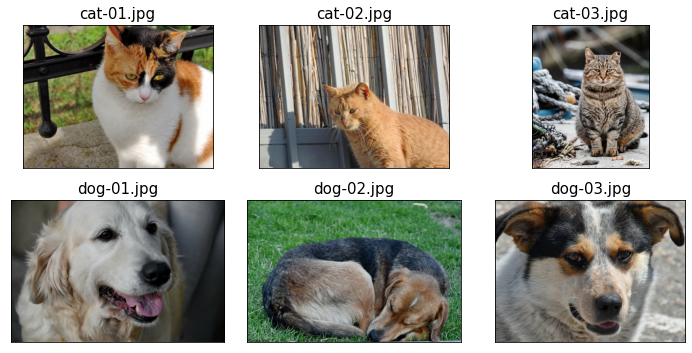

In [ ]:
import matplotlib.pyplot as plt
import os


fig = plt.figure(figsize=(10, 5))
for i,file in enumerate(file_list):
    img_raw = tf.io.read_file(file)
    img = tf.image.decode_image(img_raw)
    print('Image shape: ', img.shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)

# plt.savefig('ch13-catdot-examples.pdf')
plt.tight_layout()
plt.show()

Le immagini hanno *aspect ratio* differenti: alcune di esse sono (900x1200) pixel, altre (800x1200), altre ancora (900x742). Dovremo <u>uniformarne</u> il loro aspect ratio, dunque (tra poco).<br>
Inoltre, le etichette di queste immagini (cane o gatto) sono nel nome del file; dobbiamo dunque estrarle, assegnando 1 ai cani e 0 ai gatti.

In [ ]:
labels = [1 if 'dog' in os.path.basename(file) else 0
          for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


Utilizzando la lista dei file name e la lista delle etichette creiamo un tensore congiunto:

In [ ]:
ds_files_labels = tf.data.Dataset.from_tensor_slices(
    (file_list, labels))

for item in ds_files_labels:
    print(item[0].numpy(), item[1].numpy())

b'images\\cat_dog_images\\cat-01.jpg' 0
b'images\\cat_dog_images\\cat-02.jpg' 0
b'images\\cat_dog_images\\cat-03.jpg' 0
b'images\\cat_dog_images\\dog-01.jpg' 1
b'images\\cat_dog_images\\dog-02.jpg' 1
b'images\\cat_dog_images\\dog-03.jpg' 1


Ora dobbiamo applicare alcune trasformazioni a questo dataset:
* caricare i contenuti dell'immagine dal suo file-name;
* decodificarne i contenuti *raw*;
* modificarne la dimensione, ad esempio 80x120 (per tutte le immagini).

Ci serve una funzione ad hoc.

(80, 120, 3) 0
(80, 120, 3) 0
(80, 120, 3) 0
(80, 120, 3) 1
(80, 120, 3) 1
(80, 120, 3) 1


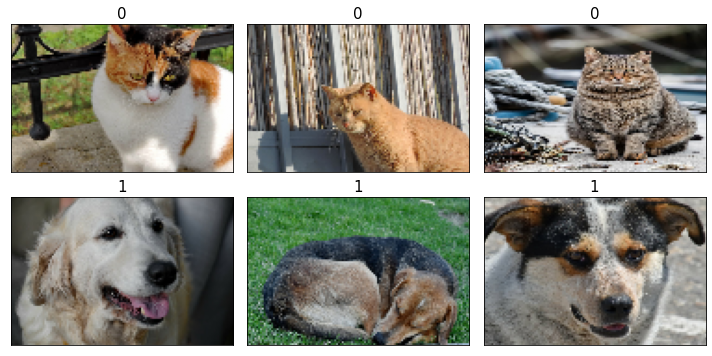

In [ ]:
# Questa funzione esegue i passi sopra descritti e restituisce un dataset sul quale possiamo re-iterare le nostre prove ed al
# quale possiamo applicare le varie operazioni viste prima.
def load_and_preprocess(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [img_height, img_width])
    image /= 255.0

    return image, label

img_width, img_height = 120, 80

ds_images_labels = ds_files_labels.map(load_and_preprocess)

fig = plt.figure(figsize=(10, 5))
for i,example in enumerate(ds_images_labels):
    print(example[0].shape, example[1].numpy())
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0])
    ax.set_title('{}'.format(example[1].numpy()),
                 size=15)

plt.tight_layout()
#plt.savefig('ch13-catdog-dataset.pdf')
plt.show()

### I *dataset* disponibili nella libreria di *tensorflow_datasets*
La libreria *tensorflow_datasets* mette a disposizione una **bella collezione di dataset** di immagini per il training e la valutazione di modelli di NN.<br><br>
Questi dataset sono <u>ben formattati</u> ed hanno <u>informazioni descrittive</u>, come il formato delle feature e delle etichette, il loro tipo e dimensione, l'articolo originario.<br><br>
Un altro vantaggio di questi dataset è che sono <u>pronti ad essere usati come oggetti *tf.data.Dataset*</u>, e quindi possiamo applicare ad essi tutte le funzioni che abbiamo visto in precedenza.

In [ ]:
# da prompt anaconda fare prima: pip install tensorflow-datasets

In [ ]:
import tensorflow_datasets as tfds

print(len(tfds.list_builders()))
print(tfds.list_builders()[:5])
                                     # al momento (aprile 2022) ci sono ben 310 dataset disponibili;
                                     # questo numero probabilmente aumenterà rapidamente (a fine 2018 erano 101).
                                     # abbiamo poi visualizzato il nome dei primi 5 dataset.

310
['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset']


In [ ]:
# per vedere la lista completa:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'booksum',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19',
 'covid19sum',
 'crema_d',
 'cs_restaurants',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'd4rl_adroit_door',
 'd4rl_adr

### Caricare un dataset dalla libreria *tensorflow_datasets*
Si chiama *fetching* e ci sono due modi differenti, che vedremo applicati a due differenti dataset: *CelebA* e *MNIST digits*.

#### Il dataset *CelebA* di *celebrità*
Useremo [questo](https://www.tensorflow.org/datasets/catalog/celeb_a) dataset. Ulteriori dettagli anche [qui](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html).<br>
Il primo modo di lettura (*fetching*) consta di tre passi:
* chiamare la funzione di costruzione dell'oggetto *dataset*;
* eseguire il metodo *download_and_prepare()*;
* chiamare il metodo *as_dataset()* per instanziare il dataset.

In [ ]:
# eseguiamo il primo passo e stampiamo le info descrittive del dataset (fornite dalla libreria):
celeba_bldr = tfds.builder('celeb_a')

print(celeba_bldr.info.features)
print('\n', 30*"=", '\n')
print(celeba_bldr.info.features.keys())
print('\n', 30*"=", '\n')
print(celeba_bldr.info.features['image'])
print('\n', 30*"=", '\n')
print(celeba_bldr.info.features['attributes'].keys())
print('\n', 30*"=", '\n')
print(celeba_bldr.info.citation)

FeaturesDict({
    'attributes': FeaturesDict({
        '5_o_Clock_Shadow': tf.bool,
        'Arched_Eyebrows': tf.bool,
        'Attractive': tf.bool,
        'Bags_Under_Eyes': tf.bool,
        'Bald': tf.bool,
        'Bangs': tf.bool,
        'Big_Lips': tf.bool,
        'Big_Nose': tf.bool,
        'Black_Hair': tf.bool,
        'Blond_Hair': tf.bool,
        'Blurry': tf.bool,
        'Brown_Hair': tf.bool,
        'Bushy_Eyebrows': tf.bool,
        'Chubby': tf.bool,
        'Double_Chin': tf.bool,
        'Eyeglasses': tf.bool,
        'Goatee': tf.bool,
        'Gray_Hair': tf.bool,
        'Heavy_Makeup': tf.bool,
        'High_Cheekbones': tf.bool,
        'Male': tf.bool,
        'Mouth_Slightly_Open': tf.bool,
        'Mustache': tf.bool,
        'Narrow_Eyes': tf.bool,
        'No_Beard': tf.bool,
        'Oval_Face': tf.bool,
        'Pale_Skin': tf.bool,
        'Pointy_Nose': tf.bool,
        'Receding_Hairline': tf.bool,
        'Rosy_Cheeks': tf.bool,
        'Sidebu

Le feature sono memorizzate nel dizionario con tre chiavi: *image*, *landmarks* e *attributes*:
* *image* si riferisce al viso della persona (celebrità);
* *landmarks* si riferisce al dizionario dei punti facciali (posizione degli occhi, del naso, ecc);
* *attributes* è un dizionario di 40 attributi facciali (relativi alla persona) come ad esempio: espressione facciale, trucco, capelli, ecc:

In [ ]:
# eseguiamo ora il secondo passo: download del dataset, preparazione e scrittura sui disco.
celeba_bldr.download_and_prepare()  # se il download è già stato eseguito (nella directory C:/Users/Utente/tensorflow_datasets),
                                    # non lo riesegue.

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

NonMatchingChecksumError: Artifact https://drive.google.com/uc?export=download&id=0B7EVK8r0v71pZjFTYXZWM3FlRnM, downloaded to C:\Users\Utente\tensorflow_datasets\downloads\ucexport_download_id_0B7EVK8r0v71pZjFTYXZWM3FlDDaXUAQO8EGH_a7VqGNLRtW52mva1LzDrb-V723OQN8.tmp.cb8b8d9af1034e579200529b12d66d23\ServiceLogin, has wrong checksum:
* Expected: UrlInfo(size=1.34 GiB, checksum='46fb89443c578308acf364d7d379fe1b9efb793042c0af734b6112e4fd3a8c74', filename='img_align_celeba.zip')
* Got: UrlInfo(size=92.65 KiB, checksum='bebadf6cb78ba67bd57779011799c919ba096d41e2d4792cc4c14d9290fef3de', filename='ServiceLogin')
To debug, see: https://www.tensorflow.org/datasets/overview#fixing_nonmatchingchecksumerror

In [ ]:
# ora instanziamo il dataset in questo modo (con il metodo 'as.dataset'):
datasets = celeba_bldr.as_dataset(shuffle_files=False)

datasets.keys()

AssertionError: Dataset celeb_a: could not find data in C:\Users\Utente\tensorflow_datasets. Please make sure to call dataset_builder.download_and_prepare(), or pass download=True to tfds.load() before trying to access the tf.data.Dataset object.

Attenzione a [questo baco noto](https://github.com/tensorflow/datasets/issues/1482), con il consiglio su come procedere.

Questo dataset è già suddiviso in training, test e validation.

In [ ]:
#import tensorflow as tf
ds_train = datasets['train']
assert isinstance(ds_train, tf.data.Dataset)

example = next(iter(ds_train))
print(type(example))
print(example.keys())

NameError: name 'datasets' is not defined

Gli elementi di questo dataset sono contenuti in un dizionario. Se vogliamo passare questo dataset ad un algoritmo di deep learning supervisionato, dobbiamo **ri-formattarlo** come *(features, label)*. Come label, usiamo la categoria *Male* degli attributi, con la trasformazione *map*:

In [ ]:
ds_train = ds_train.map(lambda item:
     (item['image'], tf.cast(item['attributes']['Male'], tf.int32)))

E finalmente possiamo estrarre le 18 immagini di training e visualizzarle con le loro etichette.

In [ ]:
ds_train = ds_train.batch(18)
images, labels = next(iter(ds_train))

print(images.shape, labels)

(18, 218, 178, 3) tf.Tensor([1 1 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0], shape=(18,), dtype=int32)


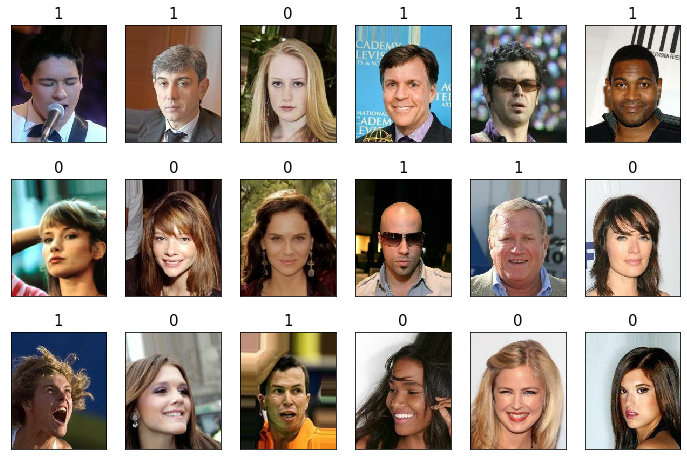

In [ ]:
fig = plt.figure(figsize=(12, 8))
for i,(image,label) in enumerate(zip(images, labels)):
    ax = fig.add_subplot(3, 6, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image)
    ax.set_title('{}'.format(label), size=15)


plt.show()

Ora il dataset *celeb_a* può essere usato per il deep learning.<br>
Vediamo ora il secondo metodo di lettura (*fetching*).

#### Il dataset *MNIST digits*
Al primo download, il metodo *tfds.load* visualizza l'avanzamento progressivo del download e l'esito.<br>
Se il dataset è già stato scaricato (nella directory *C:/Users/User/tensorflow_datasets*) allora sono visualizzate le info descrittive del dataset.

In [ ]:
mnist, mnist_info = tfds.load('mnist', with_info=True,
                              shuffle_files=False)

print(mnist_info)

print(mnist.keys())


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\Lenovo\tensorflow_datasets\mnist\3.0.1.incompleteHM3KZJ\mnist-train.tfrecord*...:   0%|    …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\Lenovo\tensorflow_datasets\mnist\3.0.1.incompleteHM3KZJ\mnist-test.tfrecord*...:   0%|     …

Dataset mnist downloaded and prepared to C:\Users\Lenovo\tensorflow_datasets\mnist\3.0.1. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='C:\\Users\\Lenovo\\tensorflow_datasets\\mnist\\3.0.1',
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={AT

Come si può vedere dai metadati sopra visualizzati, il dataset è suddiviso in training e test.<br>
Ora prendiamo il subset di training, trasformiamo gli elementi del dataset <u>da dizionario a tuple</u>, e visualizziamo 10 esempi:

(10, 28, 28, 1) tf.Tensor([4 1 0 7 8 1 2 7 1 6], shape=(10,), dtype=int64)


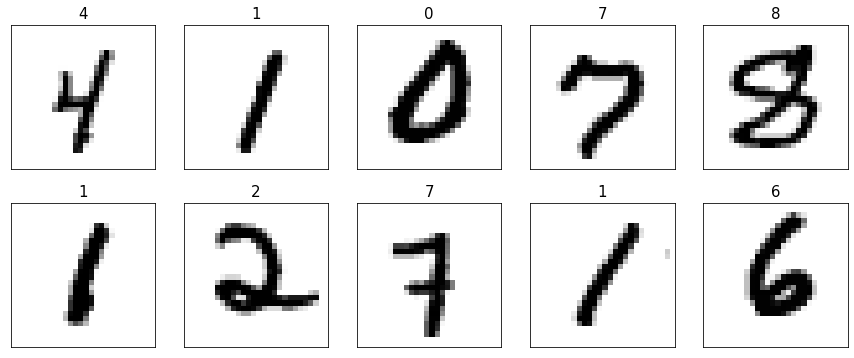

In [ ]:
ds_train = mnist['train']

assert isinstance(ds_train, tf.data.Dataset)

ds_train = ds_train.map(lambda item:
     (item['image'], item['label']))

ds_train = ds_train.batch(10)
batch = next(iter(ds_train))
print(batch[0].shape, batch[1])

fig = plt.figure(figsize=(15, 6))
for i,(image,label) in enumerate(zip(batch[0], batch[1])):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image[:, :, 0], cmap='gray_r')
    ax.set_title('{}'.format(label), size=15)

plt.show()

Ora siamo pronti a lavorare con TensorFlow.